In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.DataFrame({
    'Potência (KW)': [120, 80, 100, 110, 90, 130, 70, 105, 115, 85],
    'Eficiência (%)': [92, 65, 75, 85, 68, 95, 60, 80, 88, 70],
    'Idade (anos)': [3, 8, 5, 4, 7, 2, 10, 6, 3, 9],
    'Tamanho (m2)': [50, 45, 55, 60, 48, 62, 40, 58, 56, 47],
    'Consumo de Energia': ['Eficiente', 'Ineficiente', 'Ineficiente', 'Eficiente', 'Ineficiente', 'Eficiente', 'Ineficiente', 'Eficiente', 'Eficiente', 'Ineficiente']
})

In [3]:
# Separando as caracteristicas e o rótulo
x = data[['Potência (KW)', 'Eficiência (%)', 'Idade (anos)', 'Tamanho (m2)']]

y = data['Consumo de Energia']

Separando os dados em teste e treino

In [4]:
# Dividindo o conjunto de dados em treinamento e teste
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3,
                                                    random_state=42)

Treinando o modelo SVM

In [5]:
model = SVC(kernel='linear') # Cria o modelo SVC
model.fit(x_train, y_train) # Treina o modelo

SVC(kernel='linear')

Fazendo predições

In [6]:
y_pred = model.predict(x_test)

Avaliando as métricas do algoritmo de Machine Learning

In [7]:
accuracy = accuracy_score(y_pred, y_test)
print(accuracy)

1.0


In [8]:
# Classification_repot exibe um resumo das métricas
classi_re = classification_report(y_pred, y_test)
print(classi_re)

              precision    recall  f1-score   support

   Eficiente       1.00      1.00      1.00         2
 Ineficiente       1.00      1.00      1.00         1

    accuracy                           1.00         3
   macro avg       1.00      1.00      1.00         3
weighted avg       1.00      1.00      1.00         3



In [9]:
cm = confusion_matrix(y_pred, y_test)

Text(0.5, 1.0, 'Matriz de confusão para o algoritmo SVM')

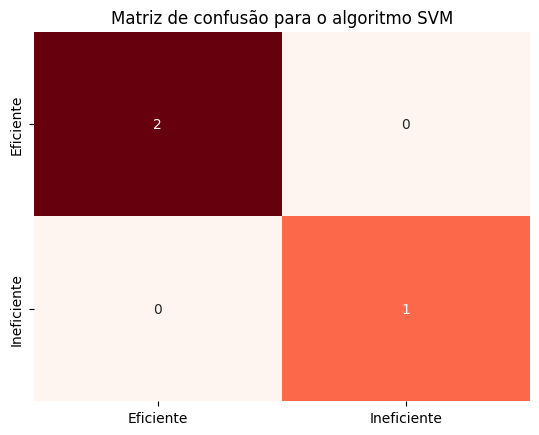

In [10]:
sns.heatmap(cm, annot=True, fmt='d', cmap='Reds', cbar=False,
            xticklabels=['Eficiente', 'Ineficiente'],
            yticklabels=['Eficiente', 'Ineficiente'])
plt.title('Matriz de confusão para o algoritmo SVM')

Visualização dos dados da máquina de forma gráfica

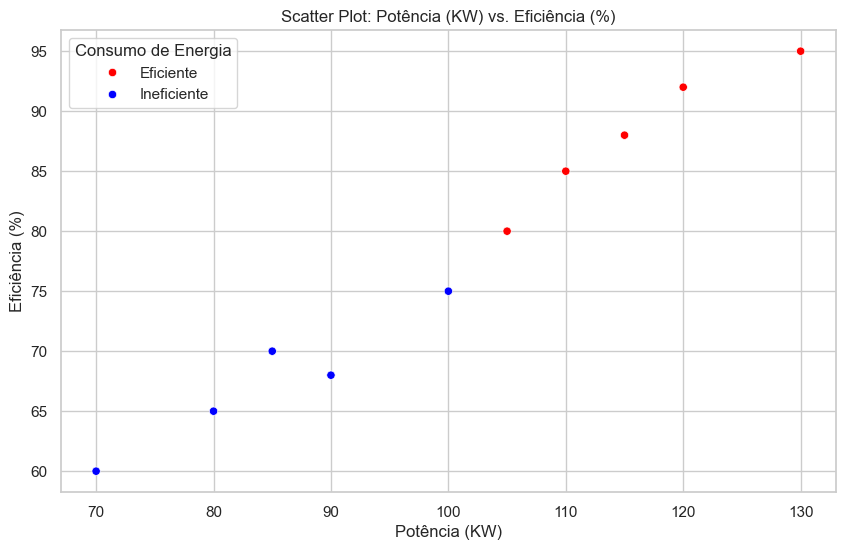

In [11]:
sns.set(style="whitegrid")
# Mapeando as cores com base na classe
palette = {"Eficiente": "red", "Ineficiente": "blue"}
# Criando o scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Potência (KW)', y='Eficiência (%)', hue='Consumo de Energia', data=data, palette= palette)

# Personalizando o gráfico
plt.title('Scatter Plot: Potência (KW) vs. Eficiência (%)')
plt.xlabel('Potência (KW)')
plt.ylabel('Eficiência (%)')

# Mostrando o gráfico
plt.legend(title='Consumo de Energia')
plt.show()